# SpaCy NER Analysis

In [1]:
import pandas as pd
import numpy as np
import os

### Get Data

In [2]:
df_ent = pd.read_csv(os.path.join("..", "Data", "merged_spacy_and_geo_v2.csv")).drop("Unnamed: 0", axis=1)
df_ent

,description,spacy_entities,GeoName_Count,Geographic_LATITUDE,Geographic_LONGITUDE,Geographic_NAME,Optional_LATITUDE1,Optional_LATITUDE2,Optional_LATITUDE3,Optional_LATITUDE4,Optional_LONGITUDE1,Optional_LONGITUDE2,Optional_LONGITUDE3,Optional_LONGITUDE4,Optional_NAME1,Optional_NAME2,Optional_NAME3,Optional_NAME4
0,Ada witch - Sometimes you can see a misty blue...,"Ada witch -, PERSON\n3-mile, QUANTITY\nthe Ada...",2,NaN,NaN,NaN,43.0125,43.00142,NaN,NaN,-85.50056,-85.49169,NaN,NaN,Egypt Valley Country Club,Findlay Cemetery,NaN,NaN
1,A little girl was killed suddenly while waitin...,"month later, DATE\nthis day, DATE\n\n",0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,If you take Gorman Rd. west towards Sand Creek...,"Gorman Rd, PERSON\nSand Creek, FAC\nA mile, QU...",0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,"In the 1970's, one room, room 211, in the old ...","1970, DATE\none, CARDINAL\n211, CARDINAL\ntoda...",0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Kappa Delta Sorority - The Kappa Delta Sororit...,Kappa Delta Sorority - The Kappa Delta Sororit...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10975,at 12 midnight you can see a lady with two lit...,"12 midnight, TIME\ntwo, CARDINAL\nSheridan St....",0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10976,Is haunted by the victims of a murder that hap...,"years ago, DATE\n\n",0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10977,The institution was for kids 18 years old and ...,"18 years old, DATE\n70, DATE\none, CARDINAL\nh...",0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10978,Gymnasium - their have been reports of a littl...,\n,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
df = pd.read_csv(os.path.join("..", "Data", "v1.tsv"), sep='\t')
for col in df.columns:
    print(col)

city
country
description
location
state
state_abbrev
longitude
latitude
city_longitude
city_latitude
clean_description
clean_spelling
Audio Evidence
Audio Reasoning
time_of_day
Witness Count
Witness Reasoning
tokenized
pos_tokenized
filtered_tokenized
lemma_filtered_tokenized
lemma_pos_tokenized
Event
apparition_types
apparition_descriptors
apparition_gender
apparition_age
apparition_types_str
apparition_descriptors_str
apparition_gender_str
apparition_age_str
unique_apparition_mentions
adjectives
unique_app_descriptor_mentions
FBI.Population.Covered
Murder per capita
Violent Crime per capita
Property Crime per capita
Undergrad_Grad_Rate
HS_Grad_Rate
STEM_Grad_Percentage
Visual Evidence
Visual Reasoning
death_rate_Alzheimer's disease
death_rate_Cancer
death_rate_Heart disease
death_rate_Unintentional injuries
death_rate_All causes
death_rate_Influenza and pneumonia
death_rate_Suicide
death_rate_Kidney disease
death_rate_CLRD
death_rate_Diabetes
Haunted Places Date
Alcohol Deaths
Alcoho

### Get Sample

In [4]:
def sample(df: pd.DataFrame, i: int, cols: list[str]=None) -> pd.core.series.Series:
    if not cols:
        return df.iloc[i]
    return df[cols].iloc[i]

def ent(i: int, inplace=False):
    """References global var df_ent"""
    if not inplace:
        print(df_ent['spacy_entities'].iloc[i])
        return
    return df_ent['spacy_entities'].iloc[i]

def ent_desc(i: int) -> None:
    """References global var df_ent"""
    print(df_ent['spacy_entities'].iloc[i])
    print(df_ent['description'].iloc[i])

def ent_desc_wit(i: int) -> None:
    """References global var df_ent"""
    print(df_ent['spacy_entities'].iloc[i])
    print(df['Witness Count'].iloc[i])
    print("")
    print(df_ent['description'].iloc[i])

In [5]:
sample(df_ent, 0)

description             Ada witch - Sometimes you can see a misty blue...
spacy_entities          Ada witch -, PERSON\n3-mile, QUANTITY\nthe Ada...
GeoName_Count                                                           2
Geographic_LATITUDE                                                   NaN
Geographic_LONGITUDE                                                  NaN
Geographic_NAME                                                       NaN
Optional_LATITUDE1                                                43.0125
Optional_LATITUDE2                                               43.00142
Optional_LATITUDE3                                                    NaN
Optional_LATITUDE4                                                    NaN
Optional_LONGITUDE1                                             -85.50056
Optional_LONGITUDE2                                             -85.49169
Optional_LONGITUDE3                                                   NaN
Optional_LONGITUDE4                   

In [6]:
ent(0)

Ada witch -, PERSON
3-mile, QUANTITY
the Ada Cemetery, FAC
2 Mile, QUANTITY
Egypt Valley, LOC
Honey Creek, GPE
late one night, TIME
late at night, TIME
the night, TIME
the 20th century, DATE
Honeycreek Road, FAC
Seidman Park, GPE
Findlay Cemetery, FAC
"Ghosts of Grand Rapids, WORK_OF_ART




In [7]:
sample(df, 0, ['Witness Count'])

Witness Count    3+
Name: 0, dtype: object

## Analysis
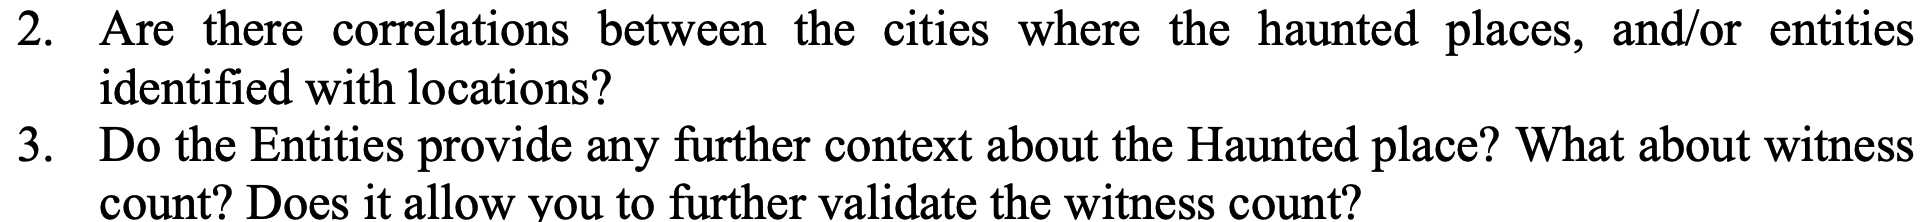

```
PERSON:      People, including fictional.
NORP:        Nationalities or religious or political groups.
FAC:         Buildings, airports, highways, bridges, etc.
ORG:         Companies, agencies, institutions, etc.
GPE:         Countries, cities, states.
LOC:         Non-GPE locations, mountain ranges, bodies of water.
PRODUCT:     Objects, vehicles, foods, etc. (Not services.)
EVENT:       Named hurricanes, battles, wars, sports events, etc.
WORK_OF_ART: Titles of books, songs, etc.
LAW:         Named documents made into laws.
LANGUAGE:    Any named language.
DATE:        Absolute or relative dates or periods.
TIME:        Times smaller than a day.
PERCENT:     Percentage, including ”%“.
MONEY:       Monetary values, including unit.
QUANTITY:    Measurements, as of weight or distance.
ORDINAL:     “first”, “second”, etc.
CARDINAL:    Numerals that do not fall under another type.
```

In [8]:
import spacy
nlp = spacy.load("en_core_web_sm")
nlp.get_pipe("ner").labels

('CARDINAL',
 'DATE',
 'EVENT',
 'FAC',
 'GPE',
 'LANGUAGE',
 'LAW',
 'LOC',
 'MONEY',
 'NORP',
 'ORDINAL',
 'ORG',
 'PERCENT',
 'PERSON',
 'PRODUCT',
 'QUANTITY',
 'TIME',
 'WORK_OF_ART')

In [9]:
ent_desc_wit(10)

Al Capone, PERSON
the next day, DATE
March, DATE


2+

there have been notes of white dogs chasing cars that pull into the drive way. People have seen people hanging form trees and working in fields in old clothing. This motel is where Al Capone did some of his work and had meetings in a secret place in the tunnels. The motel was once painted blue but the next day it was back to yellow. - March 2007 update: was torn down and a tennis court was built over it.


#### PERSON ent - Witness Count: Correlation Analysis

In [10]:
import re
from matplotlib import pyplot as plt
plt.style.use('dark_background')

In [11]:
def corr_plot(x: pd.core.series.Series, y: pd.core.series.Series) -> None:
    plt.scatter(x, y, color='C1')
    m, b = np.polyfit(x, y, 1)
    plt.plot(x, m*x+b, 'C3--', label=f"line of best fit (corr: {np.corrcoef(x, y)[0,1]:.2f})")
    plt.title(f"'{y.name}' vs. '{x.name}'")
    plt.xlabel(x.name)
    plt.ylabel(y.name)
    plt.legend()
    plt.show()

In [12]:
# get ent_person_count column
ent_person_count = []
for i in range(df_ent.shape[0]):
    current_ent = ent(i, inplace=True)
    cnt = len(re.findall(r'PERSON', current_ent)) # regex matching: PERSON
    ent_person_count.append(cnt)
df_ent['ent_person_count'] = ent_person_count
df_ent['ent_person_count']

0        1
1        0
2        1
3        0
4        0
        ..
10975    1
10976    0
10977    0
10978    0
10979    0
Name: ent_person_count, Length: 10980, dtype: int64

In [13]:
# get witness_count_int column
witness_count_int = []
for i in range(df.shape[0]):
    current_count = df['Witness Count'].iloc[i]
    if current_count.endswith('+'):
        current_count = current_count[:-1]
    if current_count == "Many":
        current_count == 100
    elif current_count == "Most":
        current_count == 500
    try:
        witness_count_int.append(int(current_count))
    except ValueError:
        witness_count_int.append(0)
df_ent['witness_count_int'] = witness_count_int
df_ent['witness_count_int']

0        3
1        3
2        2
3        3
4        2
        ..
10975    2
10976    1
10977    5
10978    3
10979    2
Name: witness_count_int, Length: 10980, dtype: int64

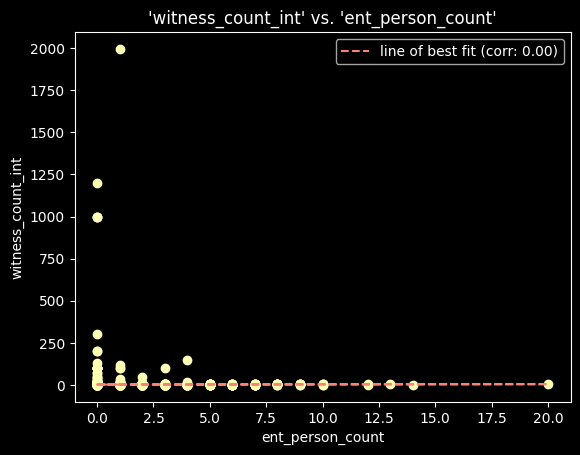

In [14]:
x, y = df_ent['ent_person_count'], df_ent['witness_count_int']
corr_plot(x, y)

No correlation observed between witness count and number of person entities.

## Location based Named Entities Analysis

In [ ]:
from collections import Counter
def count_entities(text):
    doc = nlp(text)
    return Counter(ent.label_ for ent in doc.ents)

df_ent["entity_counts"] = df_ent["description"].apply(count_entities)
print(df_ent['entity_counts'])

0        {'ORG': 2, 'QUANTITY': 1, 'FAC': 3, 'GPE': 1, ...
1                                              {'DATE': 2}
2           {'FAC': 1, 'GPE': 1, 'CARDINAL': 3, 'TIME': 2}
3        {'DATE': 2, 'CARDINAL': 4, 'ORDINAL': 1, 'TIME...
4                                {'ORG': 1, 'CARDINAL': 1}
                               ...                        
10975              {'TIME': 1, 'CARDINAL': 1, 'PERSON': 1}
10976                                          {'DATE': 1}
10977                           {'DATE': 2, 'CARDINAL': 2}
10978                                                   {}
10979                      {'ORG': 1, 'GPE': 1, 'DATE': 1}
Name: entity_counts, Length: 10980, dtype: object


In [ ]:
from collections import defaultdict
final_tally = defaultdict(int)

for count_dict in df_ent['entity_counts']:
    for entity, count in count_dict.items():
        final_tally[entity] += count

final_tally = dict(final_tally)
print(final_tally)

{'ORG': 4286, 'QUANTITY': 473, 'FAC': 903, 'GPE': 2145, 'TIME': 4193, 'DATE': 6963, 'PERSON': 4612, 'WORK_OF_ART': 429, 'CARDINAL': 5033, 'ORDINAL': 1837, 'LOC': 600, 'PRODUCT': 199, 'NORP': 1238, 'MONEY': 62, 'EVENT': 264, 'PERCENT': 15, 'LANGUAGE': 27, 'LAW': 52}


In [ ]:
sorted_tally = dict(sorted(final_tally.items(), key=lambda item: item[1], reverse=True))
print(sorted_tally)


{'DATE': 6963, 'CARDINAL': 5033, 'PERSON': 4612, 'ORG': 4286, 'TIME': 4193, 'GPE': 2145, 'ORDINAL': 1837, 'NORP': 1238, 'FAC': 903, 'LOC': 600, 'QUANTITY': 473, 'WORK_OF_ART': 429, 'EVENT': 264, 'PRODUCT': 199, 'MONEY': 62, 'LAW': 52, 'LANGUAGE': 27, 'PERCENT': 15}


{'DATE': 6963, 'CARDINAL': 5033, 'PERSON': 4612, 'ORG': 4286, 'TIME': 4193, 'GPE': 2145, 'ORDINAL': 1837, 'NORP': 1238, 'FAC': 903, 'LOC': 600, 'QUANTITY': 473, 'WORK_OF_ART': 429, 'EVENT': 264, 'PRODUCT': 199, 'MONEY': 62, 'LAW': 52, 'LANGUAGE': 27, 'PERCENT': 15}

In [ ]:
#Total name entities extracted
sorted_tally_total = sum(sorted_tally.values())
ratio_to_rows = round(sorted_tally_total/df_ent.shape[0],2)
print(f"Total name entities extracted: {sorted_tally_total}, {ratio_to_rows} NER per haunted place entry")

Total name entities extracted: 33331, 3.04 NER per haunted place entry


In [ ]:
df_ent.columns

Index(['description', 'spacy_entities', 'GeoName_Count', 'Geographic_LATITUDE',
       'Geographic_LONGITUDE', 'Geographic_NAME', 'Optional_LATITUDE1',
       'Optional_LATITUDE2', 'Optional_LATITUDE3', 'Optional_LATITUDE4',
       'Optional_LONGITUDE1', 'Optional_LONGITUDE2', 'Optional_LONGITUDE3',
       'Optional_LONGITUDE4', 'Optional_NAME1', 'Optional_NAME2',
       'Optional_NAME3', 'Optional_NAME4', 'entity_counts'],
      dtype='object')

In [ ]:
df_ent = df_ent[['description', 'spacy_entities', 'entity_counts', 'GeoName_Count', 'Geographic_LATITUDE',
       'Geographic_LONGITUDE', 'Geographic_NAME', 'Optional_LATITUDE1',
       'Optional_LATITUDE2', 'Optional_LATITUDE3', 'Optional_LATITUDE4',
       'Optional_LONGITUDE1', 'Optional_LONGITUDE2', 'Optional_LONGITUDE3',
       'Optional_LONGITUDE4', 'Optional_NAME1', 'Optional_NAME2',
       'Optional_NAME3', 'Optional_NAME4']]

In [ ]:
df_ent.to_csv('../Data/spacy_loc_analysis.csv')
print("'../Data/spacy_loc_analysis.csv' saved'")

'../Data/spacy_loc_analysis.csv' saved'


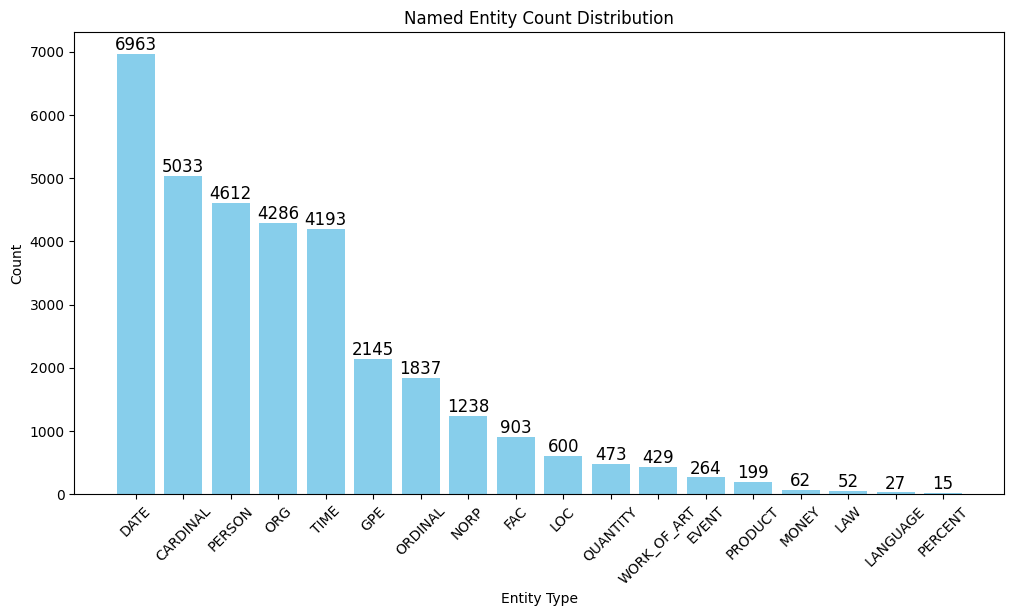

In [ ]:
import matplotlib.pyplot as plt

# Extract entities and their counts
entities = list(sorted_tally.keys())
counts = list(sorted_tally.values())

# Plot the bar chart
plt.figure(figsize=(12, 6))
bars = plt.bar(entities, counts, color='skyblue')
plt.xlabel("Entity Type")
plt.ylabel("Count")
plt.title("Named Entity Count Distribution")
plt.xticks(rotation=45)  
for bar in bars:
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height(), 
             f'{bar.get_height()}', ha='center', va='bottom', fontsize=12)
plt.show()


## GeoParse vs NER (LOC, GPE)

In [ ]:
geo_parse_sum = df_ent['GeoName_Count'].sum()
print(f"GeoName_Count total: {geo_parse_sum}")

GeoName_Count total: 1497


In [ ]:
loc_sum = 0
gpe_sum = 0
loc_gpe_sum = 0

for row in df_ent['entity_counts']:
    loc_sum += row.get('LOC', 0)
    gpe_sum += row.get('GPE', 0)

loc_gpe_sum = loc_sum + gpe_sum

print(f"Total LOC count: {loc_sum}")
print(f"Total GPE count: {gpe_sum}")
print(f"Total LOC/GPE count: {loc_gpe_sum}")

Total LOC count: 600
Total GPE count: 2145
Total LOC/GPE count: 2745


In [ ]:
loc_extract_ratio = round(loc_gpe_sum / geo_parse_sum,2)
print(f"NER ratio to GeoParse: {loc_extract_ratio}")

NER ratio to GeoParse: 1.83


NER ratio to GeoParse: 1.83 
For each extracted GeoParsed there were almost double the amount of named entity recognition with the labels LOC and GPE

In [ ]:
# Initialize a Counter to keep track of counts
loc_gpe_counts = Counter()

# Process each text and extract entities
for text in df_ent['description']:
    doc = nlp(text)
    for ent in doc.ents:
        # If the entity is of type LOC (location) or GPE (Geopolitical Entity)
        if ent.label_ in ['LOC', 'GPE']:
            loc_gpe_counts[ent.text] += 1

# Sort the counts in descending order
sorted_counts = loc_gpe_counts.most_common()

# Print the most common locations
for entity, count in sorted_counts:
    print(f"{entity}: {count}")



Washington: 22
Chicago: 21
US: 19
Ohio: 18
Mansion: 18
Auditorium: 17
Michigan: 16
East: 15
Texas: 14
California: 14
Indiana: 14
Fort: 10
Georgia: 10
Canada: 9
South: 9
America: 9
Pennsylvania: 9
St. Mary's: 9
Missouri: 9
Breakfast: 9
U.S.: 9
the United States: 8
Richmond: 8
NY: 8
England: 8
Sacramento: 8
White: 8
Tennessee: 8
Spain: 7
the Underground Railroad: 7
Oregon: 7
P.E.: 7
Belmont: 7
New York: 7
Connecticut: 7
Milwaukee: 7
Miami: 7
Nashville: 7
Detroit: 6
Salem: 6
Satan: 6
San Francisco: 6
Virginia: 6
North: 6
Maryland: 6
Illinois: 6
Morgue: 6
Kentucky: 6
Kaneohe: 6
Utah: 6
San Antonio: 6
Denver: 6
fort: 5
Agnes: 5
inn: 5
ST: 5
Hollywood: 5
Massachusetts: 5
Hwy: 5
Building: 5
New Orleans: 5
Alabama: 5
Athens: 5
Kansas City: 5
Iowa: 5
Zona: 5
Seattle: 5
Mississippi: 5
South Carolina: 5
Rockford: 4
Memphis: 4
Pittsburgh: 4
West: 4
Philadelphia: 4
Trail: 4
Lima: 4
Boston: 4
France: 4
Springfield: 4
Colorado: 4
the Sacramento River: 4
Pendleton: 4
Arkansas: 4
Warren: 4
Portland: 4


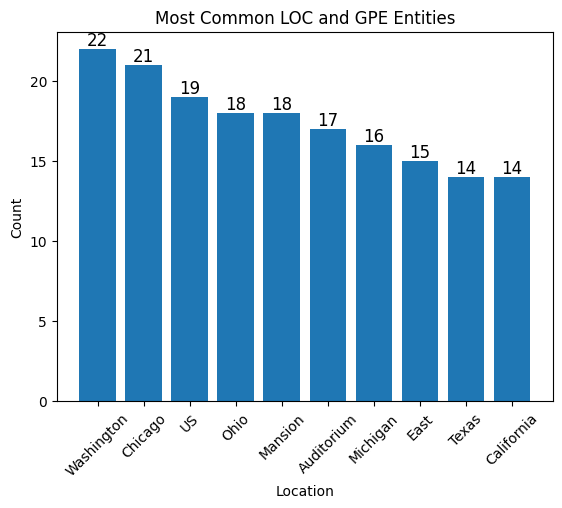

In [ ]:
# Get the top 10 most common locations (LOC and GPE)
top_loc_gpe_entities = loc_gpe_counts.most_common(10)

locations = [item[0] for item in top_loc_gpe_entities]
counts = [item[1] for item in top_loc_gpe_entities]

bars = plt.bar(locations, counts)
for bar in bars:
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height(), 
             f'{bar.get_height()}', ha='center', va='bottom', fontsize=12)
plt.xlabel('Location')
plt.ylabel('Count')
plt.title('Most Common LOC and GPE Entities')
plt.xticks(rotation=45)
plt.show()